<a href="https://colab.research.google.com/github/amirda9/ALLofMyDataGatherings/blob/master/dataMining_2022F_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we need to trun dataset into low res pictures

In [1]:
!unzip /content/drive/MyDrive/DataMining/2022F/Project/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1449).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (145).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1450).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1451).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1452).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1453).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1454).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1455).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1456).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1457).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1458).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1459).jpeg  
  inflating: Fast Food Data/Training Data/Pizza/Pizza-Train (1

In [2]:
import glob 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd 

In [3]:
train_data_dir ='/content/Fast Food Data/Training Data' 
val_data_dir = '/content/Fast Food Data/Validation Data'

In [25]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
 
path = "/content/EDSR_x4.pb"
sr.readModel(path)

sr.setModel("edsr",4)

In [ ]:
for label in os.listdir('/content/Fast Food Data/Training Data'):
  try:
    os.mkdir('/content/FF400/Training Data/'+label)
  except:
    pass
  for file_name in os.listdir("/content/Fast Food Data/Training Data"+'/'+label):
    # print(file_name)
    img = cv2.imread("/content/Fast Food Data/Training Data"+'/'+label+'/{}'.format(file_name))
    # resized = cv2.resize(img,
    #                      (50,50), interpolation = cv2.INTER_AREA)
    result = sr.upsample(img)
    resized = cv2.resize(result,
                         (256,256), interpolation = cv2.INTER_AREA)
    cv2.imwrite("/content/FF400/Training Data/"+label+'/{}'.format(file_name),resized)

In [23]:
!zip -r FFdata_50.zip /content/FF50

Streaming output truncated to the last 5000 lines.
  adding: content/FF50/Training Data/Donut/Donut (501).jpeg (deflated 5%)
  adding: content/FF50/Training Data/Donut/Donut (748).jpeg (deflated 6%)
  adding: content/FF50/Training Data/Donut/Donut (1245).jpeg (deflated 7%)
  adding: content/FF50/Training Data/Donut/Donut (35).png (deflated 4%)
  adding: content/FF50/Training Data/Donut/Donut (513).jpeg (deflated 5%)
  adding: content/FF50/Training Data/Donut/Donut (971).jpeg (deflated 6%)
  adding: content/FF50/Training Data/Donut/Donut (855).jpeg (deflated 10%)
  adding: content/FF50/Training Data/Donut/Donut (1061).jpeg (deflated 7%)
  adding: content/FF50/Training Data/Donut/Donut (1224).jpeg (deflated 6%)
  adding: content/FF50/Training Data/Donut/Donut (278).jpeg (deflated 8%)
  adding: content/FF50/Training Data/Donut/Donut (84).jpeg (deflated 8%)
  adding: content/FF50/Training Data/Donut/Donut (259).jpeg (deflated 10%)
  adding: content/FF50/Training Data/Donut/Donut (1447).jpe

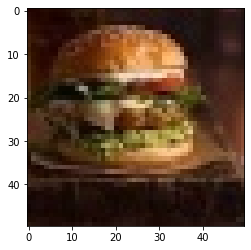

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Read image
img = cv2.imread("/content/Fast Food Data/Training Data/Burger/Burger-Train (1).jpeg")
plt.imshow(img[:,:,::-1])
plt.show()

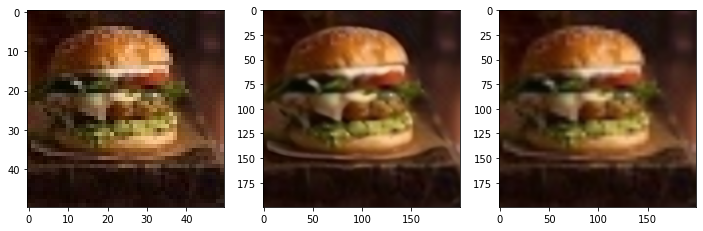

In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
 
path = "/content/EDSR_x4.pb"
 
sr.readModel(path)
 
sr.setModel("edsr",4)
 
result = sr.upsample(img)
 
# Resized image
resized = cv2.resize(img,dsize=None,fx=4,fy=4)
 
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# Original image
plt.imshow(img[:,:,::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[:,:,::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[:,:,::-1])
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    )
val_datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (180,180),
    batch_size=32,
    # class_mode default value is clasification
)
val_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size = (180,180),
    batch_size=32,
    
)

Found 7500 images belonging to 5 classes.
Found 2500 images belonging to 5 classes.
